In [63]:
import pandas as pd
import glob
from matplotlib import pyplot as plt
import numpy as np
%matplotlib widget

Comparison of General Spectral Form

In [65]:
input_dir = 'cleaned_csvs'
csv_paths = glob.glob(f'{input_dir}/*_scans.csv')
scan_16, scan_24, scan_32, scan_48, scan_64, scan_72 = [pd.read_csv(path) for path in csv_paths]
wave_no = pd.read_csv(f'{input_dir}/wave_no.csv')

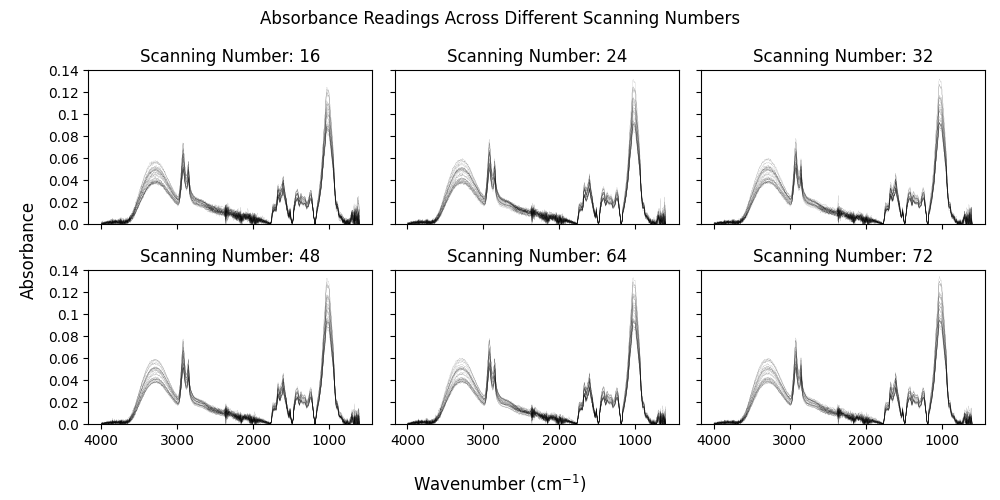

In [94]:
#Plotting All Scanning Numbers Spectra
plt.close('all')
#fig init
master_fig, axes = plt.subplots(2,3, figsize=[10,5], sharex='all',sharey='all')
axes[0,0].invert_xaxis() #inverts x axis of upper right subplot which in turn inverts that of all subplots as sharex=true

master_fig.canvas.header_visible = False
master_fig.suptitle('Absorbance Readings Across Different Scanning Numbers')
master_fig.supxlabel('Wavenumber (cm$^{-1}$)')
master_fig.supylabel('Absorbance')

#organizing data

wave_no_x = scan_64['wave_no']
pooled_df = [scan_16, scan_24, scan_32,
             scan_48, scan_64, scan_72]
sn = [16,24,32,48,64,72]

for index, (axis, df) in enumerate(zip(axes.flat, pooled_df)):
    for trial in df.columns[1:]:
        axis.plot(wave_no_x, df[trial],
                  color='black',
                  linewidth=0.05)
    axis.set(title=f'Scanning Number: {sn[index]}',
             yticks=[tick for tick in np.arange(0, 0.160, 0.020)],
             yticklabels=[tick for tick in np.arange(0, 0.160, 0.020)],
             ylim=[0,0.140])


master_fig.tight_layout()

SMDI Comparison

In [100]:
master_smdi = pd.read_csv('smdi_results/master_smdi.csv')
master_mdi = pd.read_csv('mdi_results/master_mdi.csv')

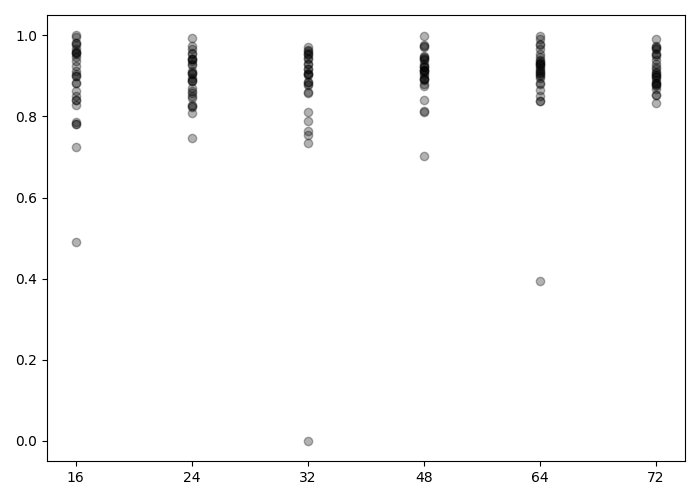

In [105]:
plt.close('all')

smdi_scatter, axis = plt.subplots(1,1, figsize=(7,5))
smdi_scatter.canvas.header_visible = False

xt = [i for i in range(len(xt))]
xtl = [16, 24, 32, 48, 64, 72]


for tick, col in zip(xt, master_smdi.columns):
    y = master_smdi[col]
    axis.scatter([tick]*len(y), y,
                 alpha=0.3,
                 color='black')

axis.set(xticks=xt,
         xticklabels=xtl)

smdi_scatter.tight_layout()


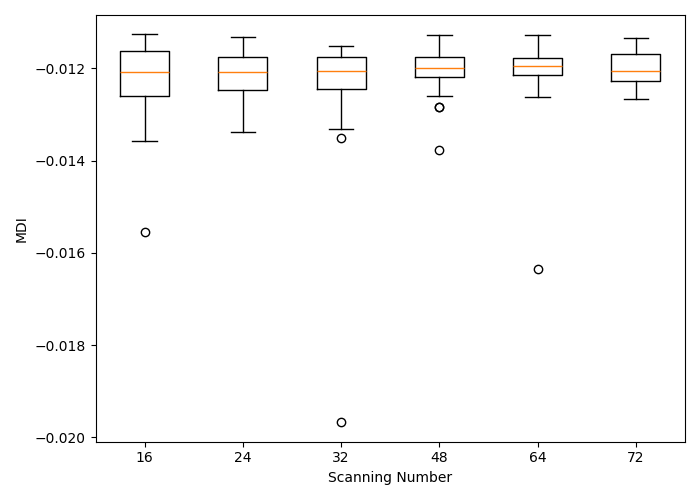

In [ ]:
plt.close('all')
mdi_box, axis = plt.subplots(1,1, figsize=(7,5))
mdi_box.canvas.header_visible = False

pooled_mdi_data = [master_mdi[col].dropna() for col in master_mdi.columns]
axis.boxplot(x=pooled_mdi_data)
axis.set(xticklabels=[16,24,32,48,64,72],
         xlabel='Scanning Number',
         ylabel='MDI')
mdi_box.tight_layout()
